## Imports

In [2]:
import pandas as pd
from bertopic import BERTopic

## Data

In [3]:
df = pd.read_csv("..\input\ingested_data\cleaned_train_documents.csv")
df.head(3)

document  \
0  My husband is a born shopper. He loves to look...   
1  Tea drinking was common in China for nearly on...   
2  Once upon a time, there was a scholar who want...   

                                      clean_document  
0  husband born shopper love look thing touch lik...  
1  tea drinking common china nearly one thousand ...  
2  upon time scholar wanted gain knowledge day ev...

In [48]:
docs = df.document.to_list()
len(docs)

25139

## BERTopic Modeling

In [6]:
# ?BERTopic

In [5]:
topic_model = BERTopic(language='english', top_n_words=15, 
                       calculate_probabilities=True, verbose=True,
                       embedding_model='all-MiniLM-L12-v2') # all-MiniLM-L6-v2
                       
topics, probs = topic_model.fit_transform(docs)

Batches: 100%|██████████| 786/786 [1:29:47<00:00,  6.85s/it]
2023-07-03 13:29:06,375 - BERTopic - Transformed documents to Embeddings
2023-07-03 13:29:45,517 - BERTopic - Reduced dimensionality
2023-07-03 13:33:47,866 - BERTopic - Clustered reduced embeddings


**`-1` represents the outliers**

In [6]:
topic_freq = topic_model.get_topic_info()
topic_freq.head()

Topic  Count                                 Name  \
0     -1   8933                     -1_he_the_his_to   
1      0   1398                      0_my_me_was_had   
2      1    305                   1_dog_dogs_cat_pet   
3      2    230       2_sports_football_players_game   
4      3    205  3_festival_year_festivals_celebrate   

                                      Representation  \
0  [he, the, his, to, and, was, she, in, of, her,...   
1  [my, me, was, had, she, her, dad, him, he, we,...   
2  [dog, dogs, cat, pet, cats, pets, animal, anim...   
3  [sports, football, players, game, ball, team, ...   
4  [festival, year, festivals, celebrate, christm...   

                                 Representative_Docs  
0  [Dear friend,\nFor the past 17 years, you have...  
1  [People like to tell me rubbish. Not just frie...  
2  [Do you like dogs? Do you know the following t...  
3  [Many reasons can explain why football is so p...  
4  [Every year people celebrate the Spring Festiv...

In [25]:
topic_model.get_topic(10)

[('college', 0.02245547925688421),
 ('colleges', 0.010184874425035647),
 ('students', 0.009930970868408367),
 ('graduates', 0.009008462445649993),
 ('university', 0.008862398392246918),
 ('universities', 0.008348228031451336),
 ('degree', 0.008155689363411395),
 ('education', 0.006751699266367389),
 ('student', 0.005352772033067239),
 ('aid', 0.005175699349703911),
 ('campus', 0.0050851834498706495),
 ('harvard', 0.004879555252979881),
 ('job', 0.004805558410047235),
 ('graduate', 0.004736261042370365),
 ('jobs', 0.004409874282846435)]

In [12]:
max(topic_model.topics_)

402

In [32]:
# topic_model.topics_
# topic_model.topic_mapper_
# topic_model.topic_labels_

In [7]:
# topic_model.visualize_topics()

In [8]:
# topic_model.visualize_barchart(top_n_topics=12)

## Saving the Model and Model Predictions

In [31]:
import os
os.makedirs("../output/saved_models", exist_ok=True)

topic_model.save("../output/saved_models/bertopic_model")

In [14]:
df = pd.DataFrame({"Document": docs, "Topic": topics})
df

Document  Topic
0      My husband is a born shopper. He loves to look...     96
1      Tea drinking was common in China for nearly on...    159
2      Once upon a time, there was a scholar who want...     -1
3      When newspapers and radio describe the damage ...    157
4      Below is a page adapted from About Wikipedia  ...    218
...                                                  ...    ...
25134  Mrs. Jones is waiting for an important telepho...     -1
25135  New York is a very large city with 8 million p...    206
25136  There are 45 students in our class. I have mad...      2
25137  Studies show that you may be lied to every day...    117
25138  You could feel sorry for Alberto Torres, who i...     -1

[25139 rows x 2 columns]

In [20]:
df['Topic_Keywords'] = df['Topic'].map(lambda topic_num: topic_model.topic_labels_[topic_num].split('_')[1:])

In [21]:
df.head()

Document  Topic  \
0  My husband is a born shopper. He loves to look...     96   
1  Tea drinking was common in China for nearly on...    159   
2  Once upon a time, there was a scholar who want...     -1   
3  When newspapers and radio describe the damage ...    157   
4  Below is a page adapted from About Wikipedia  ...    218   

                               Topic_Keywords  
0      [shopping, customer, customers, store]  
1               [tea, drink, green, drinking]  
2                          [he, the, his, to]  
3      [hurricane, storm, tornado, tornadoes]  
4  [wikipedia, information, search, articles]

In [24]:
import os
os.makedirs("../output/model_outputs/BERTopic_Output", exist_ok=True)

df.to_csv("../output/model_outputs/BERTopic_Output/Train_Set_BERTopic_Topic_Modeling.csv")


## Loading Saved Model

In [4]:
loaded_topic_model = BERTopic.load("../output/saved_models/bertopic_model")

In [5]:
loaded_topic_model.get_topic_info().head()

Topic  Count                                 Name  \
0     -1   8933                     -1_he_the_his_to   
1      0   1398                      0_my_me_was_had   
2      1    305                   1_dog_dogs_cat_pet   
3      2    230       2_sports_football_players_game   
4      3    205  3_festival_year_festivals_celebrate   

                                      Representation  \
0  [he, the, his, to, and, was, she, in, of, her,...   
1  [my, me, was, had, she, her, dad, him, he, we,...   
2  [dog, dogs, cat, pet, cats, pets, animal, anim...   
3  [sports, football, players, game, ball, team, ...   
4  [festival, year, festivals, celebrate, christm...   

                                 Representative_Docs  
0  [Dear friend,\nFor the past 17 years, you have...  
1  [People like to tell me rubbish. Not just frie...  
2  [Do you like dogs? Do you know the following t...  
3  [Many reasons can explain why football is so p...  
4  [Every year people celebrate the Spring Festiv...

## Visualizing Topics

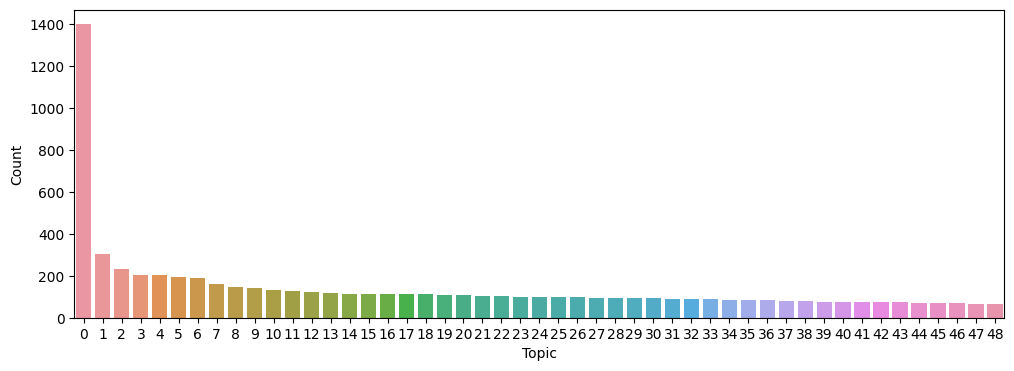

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


topic_freq = loaded_topic_model.get_topic_info()

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=topic_freq['Topic'][1:50], y=topic_freq['Count'][1:50], ax=ax);

In [5]:
loaded_topic_model.visualize_topics()

In [9]:
loaded_topic_model.visualize_barchart(top_n_topics=12)

In [18]:
df = pd.read_csv("../output/model_outputs/BERTopic_Output/Train_Set_BERTopic_Topic_Modeling.csv")
df.head()

Unnamed: 0                                           Document  Topic  \
0           0  My husband is a born shopper. He loves to look...     96   
1           1  Tea drinking was common in China for nearly on...    159   
2           2  Once upon a time, there was a scholar who want...     -1   
3           3  When newspapers and radio describe the damage ...    157   
4           4  Below is a page adapted from About Wikipedia  ...    218   

                                      Topic_Keywords  
0     ['shopping', 'customer', 'customers', 'store']  
1              ['tea', 'drink', 'green', 'drinking']  
2                         ['he', 'the', 'his', 'to']  
3     ['hurricane', 'storm', 'tornado', 'tornadoes']  
4  ['wikipedia', 'information', 'search', 'articl...

<Axes: ylabel='Topic'>

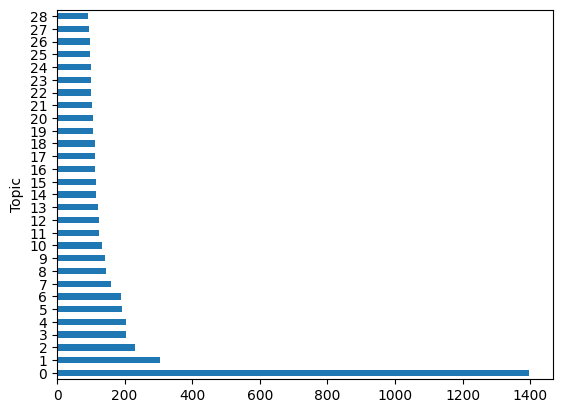

In [26]:
df['Topic'].value_counts()[1:30].plot(kind='barh')

### Visualize Topic Probabilities

The variable `probabilities` that is returned from `transform()` or `fit_transform()` can 
be used to understand how confident BERTopic is that certain topics can be found in a document. 

To visualize the distributions, we simply call:

In [28]:
probs = loaded_topic_model.probabilities_

In [31]:
loaded_topic_model.visualize_distribution(probs[200], min_probability=0.001)

## Search Topics

After having trained our model, we can use `find_topics` to search for topics that are similar 
to an input search_term. Here, we are going to be searching for topics that closely relate the 
search term "vehicle". Then, we extract the most similar topic and check the results: 

In [50]:
similar_topics, similarity = loaded_topic_model.find_topics("phone", top_n=10)
similar_topics

[4, 158, 386, 194, 291, 347, 160, 212, 306, 127]

In [51]:
similarity

[0.7256495,
 0.48105523,
 0.46070388,
 0.42009223,
 0.41683507,
 0.41058636,
 0.2922044,
 0.2654422,
 0.26070693,
 0.25369257]

In [52]:
loaded_topic_model.get_topic(4)

[('phone', 0.02755985897808383),
 ('mobile', 0.02161492644781402),
 ('phones', 0.021055265691683638),
 ('cell', 0.011546380088714961),
 ('iphone', 0.009485181043853265),
 ('calls', 0.00609720166680514),
 ('cellphone', 0.0058772561820019074),
 ('use', 0.00479588719887758),
 ('call', 0.004603567147937049),
 ('3g', 0.0042347918793222104),
 ('telephone', 0.004108017222587686),
 ('messages', 0.003987534478320357),
 ('text', 0.003983445452122063),
 ('users', 0.0038754299870480094),
 ('devices', 0.0038397057088589777)]

## Topic Reduction

In [49]:
df = pd.read_csv("..\input\ingested_data\cleaned_train_documents.csv")
docs = df.document.to_list()

In [53]:
loaded_topic_model.reduce_topics(docs, nr_topics=25)

In [57]:
# Access the newly updated topics with:
loaded_topic_model.get_topic_info()

Topic  Count                         Name  \
0      -1   8933             -1_the_to_and_of   
1       0   3180             0_my_was_the_and   
2       1   1652             1_you_to_the_and   
3       2   1356              2_the_and_to_of   
4       3   1184              3_the_in_of_and   
5       4    982        4_to_students_the_and   
6       5    962              5_the_and_of_in   
7       6    929              6_the_to_of_and   
8       7    842            7_of_the_food_and   
9       8    636              8_to_the_and_of   
10      9    514            9_water_the_of_to   
11     10    474             10_the_car_to_of   
12     11    460             11_the_of_to_and   
13     12    412             12_the_of_in_and   
14     13    401      13_the_festival_day_and   
15     14    372             14_the_of_and_in   
16     15    353         15_music_she_the_her   
17     16    311            16_the_fish_of_to   
18     17    297             17_the_and_to_of   
19     18    255  18_english_language_you_the   
20     19    239      19_the_space_moon_earth   
21     20    205          20_the_flu_virus_of   
22     21     94            21_yoga_the_to_of   
23     22     70           22_lie_to_the_that   
24     23     26       23_skin_pain_your_feel   

                                       Representation  \
0   [the, to, and, of, in, he, is, it, that, you, ...   
1   [my, was, the, and, he, to, me, she, his, it, ...   
2   [you, to, the, and, of, that, is, in, are, you...   
3   [the, and, to, of, in, is, are, that, they, it...   
4   [the, in, of, and, to, chinese, is, china, he,...   
5   [to, students, the, and, of, in, sleep, you, s...   
6   [the, and, of, in, to, you, is, are, for, it, ...   
7   [the, to, of, and, is, in, it, that, you, are,...   
8   [of, the, food, and, to, in, is, that, it, are...   
9   [to, the, and, of, for, in, money, you, is, th...   
10  [water, the, of, to, in, and, is, that, smokin...   
11  [the, car, to, of, cars, in, and, are, driving...   
12  [the, of, to, and, in, that, is, robot, robots...   
13  [the, of, in, and, to, art, is, museum, for, i...   
14  [the, festival, day, and, of, in, to, year, is...   
15  [the, of, and, in, to, earthquake, fire, is, t...   
16  [music, she, the, her, in, of, to, and, was, t...   
17  [the, fish, of, to, and, in, sea, ocean, it, t...   
18  [the, and, to, of, are, is, in, hair, that, cl...   
19  [english, language, you, the, words, of, in, n...   
20  [the, space, moon, earth, of, mars, to, in, on...   
21  [the, flu, virus, of, in, to, and, is, health,...   
22  [yoga, the, to, of, in, climbing, and, you, da...   
23  [lie, to, the, that, of, cheating, it, passwor...   
24  [skin, pain, your, feel, touch, you, the, sth,...   

                                  Representative_Docs  
0   [Sometimes the best advice doesn't come from a...  
1   [When I walked into the house after school, th...  
2   ["You don't have to be great to get started, b...  
3   [Today, many species of animals and plants are...  
4   [I was watching some little kids play soccer. ...  
5   [Japanese students work very hard but many are...  
6   [If you are living in the city, have you ever ...  
7   [As the mobile phones so widely appear in our ...  
8   [What do you eat every day? Some people think ...  
9   [Many children first learn the value of money ...  
10  [Napoga is a 12-year-old girl in Ghana ,Africa...  
11  [You want to run across the street to catch th...  
12  [We have a real crisis in this country in the ...  
13  [The summer I was ten, my mother decided to br...  
14  [Every year there is the Spring Festival in Ch...  
15  [Earthquakes strike suddenly at any time of th...  
16  [Listening to your favorite music can make a p...  
17  [You may have heard the popular saying, "there...  
18  [What is your favorite colour? Do you like yel...  
19  [There are more than 3000 languages in the wor...  
20  [Man has been to the moon. It has been the fir...  
21  [Many peop

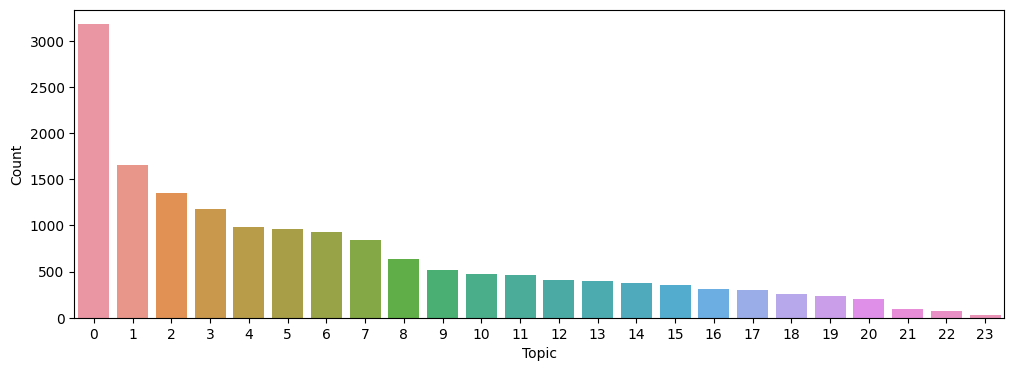

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


topic_freq = loaded_topic_model.get_topic_info()

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=topic_freq['Topic'][1:], y=topic_freq['Count'][1:], ax=ax);

In [60]:
loaded_topic_model.get_topic(0)

[('my', 0.031783928365238676),
 ('was', 0.02941755396581636),
 ('the', 0.02884528865384205),
 ('and', 0.02702999025364243),
 ('he', 0.02669457658678548),
 ('to', 0.026469673133248783),
 ('me', 0.02101528015438354),
 ('she', 0.01993999999191785),
 ('his', 0.018918654407623237),
 ('it', 0.01877895772039327),
 ('in', 0.01839471622887754),
 ('that', 0.018053337791906952),
 ('of', 0.017906655744087577),
 ('her', 0.01776044259675919),
 ('had', 0.017440480036898562)]

In [61]:
loaded_topic_model.get_topic(1)

[('you', 0.02866859820407761),
 ('to', 0.028465886758795293),
 ('the', 0.023413563401331716),
 ('and', 0.023206405261098486),
 ('of', 0.02292510694712279),
 ('that', 0.021504929109202865),
 ('is', 0.020519702837640458),
 ('in', 0.02027917205101787),
 ('are', 0.018824013718450033),
 ('your', 0.01807973459021408),
 ('it', 0.017986927016749206),
 ('they', 0.017447102443223183),
 ('be', 0.016623924838622524),
 ('people', 0.015771302023899085),
 ('their', 0.01573923168531642)]

In [62]:
loaded_topic_model.get_topic(2)

[('the', 0.033376594661942226),
 ('and', 0.024849860497269182),
 ('to', 0.024392532993022343),
 ('of', 0.024365143300344953),
 ('in', 0.022468435018996306),
 ('is', 0.018096067034968397),
 ('are', 0.017018084158970635),
 ('that', 0.01676761699109716),
 ('they', 0.01666119199291676),
 ('it', 0.01563008994871432),
 ('for', 0.015625811540889736),
 ('animals', 0.015534052746866273),
 ('dog', 0.01449382056368913),
 ('dogs', 0.012554995372174381),
 ('have', 0.012527487372871855)]